<a href="https://colab.research.google.com/github/JuanSebastianMoralesVilla/IA_REPOSITORY/blob/main/Taller_2_IA_carga_y_exploracio%CC%81n_de_datos_v3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Taller 2: Carga y exploración de datos.**

**Curso: 09481 - Inteligencia Artificial.**

**Universidad ICESI.**

**Gonzalo De Varona - A00358687**

**Sebastian Morales - A00365920**

# Accediendo a archivos de Google Drive, Google Colab, y de su máquina local.

¿Cómo acceder a los archivos desde Google Drive? 

In [ ]:
#Al ejecutar esta celda, Google colab lo va a llevar a su cuenta de google, 
#y le va a pedir que copie y pegue un código un código de acceso en un recuadro.

from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [ ]:
#Este código va a crear un archivo de texto denominado "archivo_prueba.txt" en la raíz de 
#su google drive. El archivo tiene la cadena de caracteres 'Archivo de prueba en Google Drive.'. 

with open('/gdrive/My Drive/archivo_prueba.txt', 'w') as f:
  f.write('Archivo de prueba para verificar que la conexión con Google Drive fue exitosa.')
!cat '/gdrive/My Drive/archivo_prueba.txt'



Archivo de prueba para verificar que la conexión con Google Drive fue exitosa.

¿Cómo subir archivos desde su máquina local a Google Colab?

In [ ]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('El usuario cargó el archivo "{name}" que tiene un tamaño de {length} bytes'.format(name=fn, length=len(uploaded[fn])))

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


¿Cómo descargar archivos de google Colab a su máquina local?

In [ ]:
from google.colab import files

with open('archivo_de_prueba_2.txt', 'w') as f:
  f.write('Este es un archivo de prueba.')

files.download('archivo_de_prueba_2.txt')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Para mayor información, consulte: https://colab.research.google.com/notebooks/io.ipynb#scrollTo=p2E4EKhCWEC5

# Carga de un conjunto de datos tabulares.

In [ ]:
#Vamos a importar las librerías que vamos a utilizar.

import pandas as pd                #Importamos la librería pandas. Nos va a servir para leer y manipular conjuntos de datos tabulares.
import matplotlib.pyplot as plt    #Importamos pyplot de librería matplotlib. Lo vamos a utilizar para graficar.
import seaborn as sns              #Importamos la librería Seaborn. La vamos a utilizar para graficar.
import numpy as np                 #Importamos la librería numpy para manipular arreglos. 
from google.colab import files     #Esta librería nos sirve para cargar archivos desde el disco duro.
from scipy.stats import iqr
from ast import literal_eval

In [ ]:
#Primero vamos a descargar el archivo "auto-mpg.csv" en nuestra máquina local desde Moodle o desde esta ruta: https://www.kaggle.com/uciml/autompg-dataset

#Ahora cargamos el archivo que tiene el conjunto de datos "auto-mpg.csv"
uploaded = files.upload()

In [ ]:
# Vamos a leer el conjunto de datos en un dataframe de pandas. 
df = pd.read_csv('/content/drive/MyDrive/datasets/auto-mpg.csv',    #Ruta completa a la ubicación del archivo de interés.  
                 na_values='?')              #Como el archivo contiene algunos caracteres ?, con este comando pandas los interpreta como nan (not a number).

# Revisemos las primeras filas del dataframe.
df.head()  #Si quiere imprimir n filas, use n como argumento de este método.

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino


# Manejo básico de Pandas

In [ ]:
#Imprimamos todas las observaciones del atributo mpg.
print(df['mpg'],'\n')   #Note que puede seleccionar una columna entera del dataframe usando el nombre de la columna en cuestión.

#Revisemos el tipo de dato de esta selección.
print('Tipo:', type(df),'\n')
print('Tipo:', type(df['mpg']),'\n')  #Es una serie !

#Vamos a extraer las primeros 4 primeras observaciones del atributo mpg como una serie de pandas.
print('Resultado de la selección:\n', df['mpg'].iloc[0:4], sep='')

0      18.0
1      15.0
2      18.0
3      16.0
4      17.0
       ... 
393    27.0
394    44.0
395    32.0
396    28.0
397    31.0
Name: mpg, Length: 398, dtype: float64 

Tipo: <class 'pandas.core.frame.DataFrame'> 

Tipo: <class 'pandas.core.series.Series'> 

Resultado de la selección:
0    18.0
1    15.0
2    18.0
3    16.0
Name: mpg, dtype: float64


In [ ]:
#Imprimamos la primera observación (i.e.: la primera fila) del dataframe.
obs1 = df.iloc[0,:]   #[filas, columnas]
print('Primera observación del conjunto de datos:\n',obs1,'\n')

#Qué tipo tiene esta selección que hice?
print('Tipo de la primera observación del conjunto de datos: ', type(obs1),'\n')  #Es una serie !

#Ahora intentemos extraer la segunda observación (i.e.: índice 1) del atributo horsepower (i.e.: índice 3):
print('La segunda observación del atributo horsepower es ', df.iloc[1,3])   #Nota: iloc sólo acepta índices numéricos.

Primera observación del conjunto de datos:
 mpg                                  18.0
cylinders                               8
displacement                        307.0
horsepower                          130.0
weight                               3504
acceleration                         12.0
model year                             70
origin                                  1
car name        chevrolet chevelle malibu
Name: 0, dtype: object 

Tipo de la primera observación del conjunto de datos:  <class 'pandas.core.series.Series'> 

La segunda observación del atributo horsepower es  165.0


In [ ]:
# Qué tal si quiero extraer un subconjunto de las observaciones?
df_sub = df.iloc[0:10,:] #Tome las filas de la 0 a la 9, y todos los atributos.
print(df_sub.shape)      #(filas, columnas) = (observaciones, atributos)
print(type(df_sub))

(10, 9)
<class 'pandas.core.frame.DataFrame'>


In [ ]:
df_sub.head()

# Exploración básica del conjunto de datos tabular.

## **Actividad 1. Identifique:**

*   a. Número de observaciones.
*   b. Número de atributos.
*   c. Nombre y tipo de cada uno de los atributos.
*   d. Investigue qué representa cada uno de los atributos del dataset.
*   e. Cuáles atributos toman valores discretos y cuáles atributos toman valores continuos.









In [ ]:
print("a. Número observaciones:", df.shape[0])
print("b. Número de atributos:", df.shape[1])
print("c. Nombre de atributos:","\n", df.dtypes)

a. Número observaciones: 398
b. Número de atributos: 9
c. Nombre de atributos: 
 mpg             float64
cylinders         int64
displacement    float64
horsepower      float64
weight            int64
acceleration    float64
model year        int64
origin            int64
car name         object
dtype: object


d. atributos del data set:
 * **Mpg  :** Indica la cantidad de millas recorridas por galon de cada vehiculo. 

 * **Cylinders:** Componente del motor , este indica la cantidad de cilindros de cada motor


* **Displacement:** Cantidad total de millas recorridas con el tanque completo.

* **Horsepower:** Los caballos de fuerza son una medida de la velocidad a la que se realiza el trabajo y difieren del torque, que es una medida de la cantidad de fuerza aplicada para hacer ese trabajo.

* **Weight:** El peso en vacío de un vehículo es el peso del vehículo cuando está cargado con combustible y el aceite y todo el equipamiento de serie, sin conductor ni pasajeros ni carga añadida. 

* **Acceleration :** La aceleración es aquella capacidad de los coches para pasar de una velocidad a otra en un tiempo determinado. Para determinar la aceleración de un vehículo, se toman dos valores en km, el 0 y el 100 y se mide el tiempo en segundos que tarda el coche en acelerar de 0 a 100 km/h.

* **Model year:** Año de fabrbiracion del vehiculo.

* **Origin:**       Variable con valores de 1 a 3 , que determina la region del fabricante del vehiculo:
    * 1. AMERICA (chevrolet, dodge, ford, etc)
    * 2. EUROPA (audi, mercedez benz, renault)
    * 3. ASIA (toyoya, datsun)

* **Car name:** Nombre del carro junto a la marca.    


e. Información de atributos:

* Millas por galón: continuo
* Cilindros: discreto multivalor
* Desplazamiento: continuo
* Caballos de fuerza: continua
* peso: continuo
* Aceleración: continua
* Año del modelo: discreto multivaluado
* Origen: discreto multivaluado
* Nombre del coche: cadena (única para cada instancia)





## **Actividad 2. Obtenga algunas estadísticas básicas de cada atributo para entender mejor el conjunto de datos. Con la información obtenida:**
*   a. Calcule el IQR (Interquartile Range) para cada atributo.
*   b. ¿Es posible que determinar la presencia de 'outliers' en algún atributo?¿Por qué?¿Cuál o cuáles?



In [ ]:
print("Punto a \nrango iqr para cada atributo")
p25 = df.quantile( 0.25)  
p75 = df.quantile(0.75) 
iqr = p75 - p25

print(iqr)



Punto a 
rango iqr para cada atributo
mpg               11.50
cylinders          4.00
displacement     157.75
horsepower        51.00
weight          1384.25
acceleration       3.35
model year         6.00
origin             1.00
dtype: float64


**Punto b**

Si es posible determinar la presencia de outliers en todos los atributos menos en el último que no es cuantitativo, a continuación se evidencian cuales atributos tienen outliers y en que proporción:

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


cantidad de outliers en mpg : 1 . Porcentaje del total: 0.25125628140703515%
cantidad de outliers en cylinders : 0 . Porcentaje del total: 0.0%
cantidad de outliers en displacement : 0 . Porcentaje del total: 0.0%
cantidad de outliers en horsepower : 10 . Porcentaje del total: 2.512562814070352%
cantidad de outliers en weight : 0 . Porcentaje del total: 0.0%
cantidad de outliers en acceleration : 7 . Porcentaje del total: 1.7587939698492463%
cantidad de outliers en model year : 0 . Porcentaje del total: 0.0%
cantidad de outliers en origin : 0 . Porcentaje del total: 0.0%


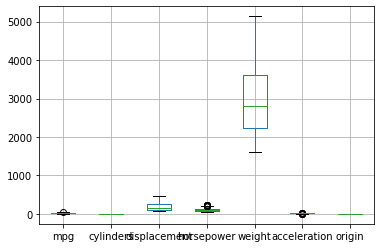

In [ ]:

plot = df.boxplot(column=['mpg',"cylinders",'displacement','horsepower','weight','acceleration','origin'])


lowerRanges = (p25 - 1.5 * iqr)
upperRanges = (p75 + 1.5 *iqr)


for col in df:
  if(col != "car name"):
    lowerRange = lowerRanges[col]
    upperRange = upperRanges[col]
    outliers = sum( (df[col]< lowerRange) |(df[col]>upperRange))
    print("cantidad de outliers en",col,":",outliers, ". Porcentaje del total:", str((outliers/len(df[col]))*100)+"%")




## **Actividad 3. Cambiar el tipo de dato del atributo 'car name' de object a string.**

In [ ]:
df['car name'] = pd.Series(df['car name'], dtype="string")
df.dtypes





mpg             float64
cylinders         int64
displacement    float64
horsepower      float64
weight            int64
acceleration    float64
model year        int64
origin            int64
car name         string
dtype: object

## Revisión de los valores de cada atributo

In [ ]:
#Ahora revisemos algunos valores de las series de cada atributo.
atributo_de_interes = df.columns[0]  #Índices de atributos válidos para este conjunto de datos 0...7 (porque el 8 es string)
print('Vamos a explorar el atributo ', atributo_de_interes,'\n')

a = df[atributo_de_interes].values
print('Valores: ', a,'\n')
print('Tipo: ', type(a),'\n')  #Es un ndarray para las variables numéricas, un StringArray para 'car name'.
print('Dimensiones: ', a.shape,'\n')  #Es arreglo de rango 1. Es decir que es un vector, pero no es ni fila ni columna !!!

#Cambio de forma (para las variables númericas) a un vector columna.
b = a.reshape((-1,1)) 
print('Nueva dimensión: ', b.shape,'\n')

# #Cambio de forma (para las variables númericas) a un vector fila.
c = a.reshape((1,-1))  
print('Nueva dimensión: ', c.shape,'\n')

Vamos a explorar el atributo  mpg 

Valores:  [18.  15.  18.  16.  17.  15.  14.  14.  14.  15.  15.  14.  15.  14.
 24.  22.  18.  21.  27.  26.  25.  24.  25.  26.  21.  10.  10.  11.
  9.  27.  28.  25.  25.  19.  16.  17.  19.  18.  14.  14.  14.  14.
 12.  13.  13.  18.  22.  19.  18.  23.  28.  30.  30.  31.  35.  27.
 26.  24.  25.  23.  20.  21.  13.  14.  15.  14.  17.  11.  13.  12.
 13.  19.  15.  13.  13.  14.  18.  22.  21.  26.  22.  28.  23.  28.
 27.  13.  14.  13.  14.  15.  12.  13.  13.  14.  13.  12.  13.  18.
 16.  18.  18.  23.  26.  11.  12.  13.  12.  18.  20.  21.  22.  18.
 19.  21.  26.  15.  16.  29.  24.  20.  19.  15.  24.  20.  11.  20.
 21.  19.  15.  31.  26.  32.  25.  16.  16.  18.  16.  13.  14.  14.
 14.  29.  26.  26.  31.  32.  28.  24.  26.  24.  26.  31.  19.  18.
 15.  15.  16.  15.  16.  14.  17.  16.  15.  18.  21.  20.  13.  29.
 23.  20.  23.  24.  25.  24.  18.  29.  19.  23.  23.  22.  25.  33.
 28.  25.  25.  26.  27.  17.5 16.  15.5 14.

## **Actividad 4. Modifique el código anterior de tal manera que también funcione con el atributo 'car name'.**

In [ ]:
atributo_de_interes = df.columns[8]  #Índices de atributos válidos para este conjunto de datos 0...7 (porque el 8 es string)
print('Vamos a explorar el atributo ', atributo_de_interes,'\n')

df['car name'] = pd.Series(df['car name'], dtype="object")

a = df[atributo_de_interes].values

print('Valores: ', a,'\n')
print('Tipo: ', type(a),'\n')  #Es un ndarray para las variables numéricas, un StringArray para 'car name'.
print('Dimensiones: ', a.shape,'\n')  #Es arreglo de rango 1. Es decir que es un vector, pero no es ni fila ni columna !!!



#Cambio de forma (para las variables númericas) a un vector columna.
b = a.reshape((-1,1)) 
print('Nueva dimensión: ', b.shape,'\n')

# #Cambio de forma (para las variables númericas) a un vector fila.
c = a.reshape((1,-1))  
print('Nueva dimensión: ', c.shape,'\n')

Vamos a explorar el atributo  car name 

Valores:  ['chevrolet chevelle malibu' 'buick skylark 320' 'plymouth satellite'
 'amc rebel sst' 'ford torino' 'ford galaxie 500' 'chevrolet impala'
 'plymouth fury iii' 'pontiac catalina' 'amc ambassador dpl'
 'dodge challenger se' "plymouth 'cuda 340" 'chevrolet monte carlo'
 'buick estate wagon (sw)' 'toyota corona mark ii' 'plymouth duster'
 'amc hornet' 'ford maverick' 'datsun pl510'
 'volkswagen 1131 deluxe sedan' 'peugeot 504' 'audi 100 ls' 'saab 99e'
 'bmw 2002' 'amc gremlin' 'ford f250' 'chevy c20' 'dodge d200' 'hi 1200d'
 'datsun pl510' 'chevrolet vega 2300' 'toyota corona' 'ford pinto'
 'amc gremlin' 'plymouth satellite custom' 'chevrolet chevelle malibu'
 'ford torino 500' 'amc matador' 'chevrolet impala'
 'pontiac catalina brougham' 'ford galaxie 500' 'plymouth fury iii'
 'dodge monaco (sw)' 'ford country squire (sw)' 'pontiac safari (sw)'
 'amc hornet sportabout (sw)' 'chevrolet vega (sw)' 'pontiac firebird'
 'ford mustang' 'mercur

# Valores faltantes

## **Actividad 5.**

*   a. Identifique si hay valores faltantes y en cuál o cuáles atributos.
*   b. Haga una copia del dataset original en la variable (tipo pandas dataframe) df_no_nan y sobre ella aplique alguna técnica para el manejo de valores faltantes y justifique por qué la utilizó.

In [ ]:
print("Punto a")

for column in df:
  print("Valores faltantes en la columna",column,":", df[column].isnull().sum())

print("\n")
print("Punto b")

df_no_nan = df.copy()

df_no_nan['horsepower'].fillna(df_no_nan['horsepower'].mean(), inplace=True)
print("Valores faltantes en la columna",df_no_nan['horsepower'],":", df_no_nan['horsepower'].isnull().sum())



Punto a
Valores faltantes en la columna mpg : 0
Valores faltantes en la columna cylinders : 0
Valores faltantes en la columna displacement : 0
Valores faltantes en la columna horsepower : 6
Valores faltantes en la columna weight : 0
Valores faltantes en la columna acceleration : 0
Valores faltantes en la columna model year : 0
Valores faltantes en la columna origin : 0
Valores faltantes en la columna car name : 0


Punto b
Valores faltantes en la columna 0      130.0
1      165.0
2      150.0
3      150.0
4      140.0
       ...  
393     86.0
394     52.0
395     84.0
396     79.0
397     82.0
Name: horsepower, Length: 398, dtype: float64 : 0


# Visualización exploratoria

## **Actividad 6. Modifique el dataframe df_no_nan de tal manera que convierta los datos de la columna mpg (millas por galón) a kpg (kilómetros por galón) y renombre de esa manera el atributo**

In [ ]:
df_no_nan.rename(columns={'mpg':'kpg'}, inplace=True)
df_no_nan["kpg"] = df_no_nan["kpg"] * float(1.6093)
print(df_no_nan["kpg"])






0      28.9674
1      24.1395
2      28.9674
3      25.7488
4      27.3581
        ...   
393    43.4511
394    70.8092
395    51.4976
396    45.0604
397    49.8883
Name: kpg, Length: 398, dtype: float64


## **Actividad 8. En este dataset la variable 'target' es mpg (ahora kpg), por lo tanto para el resto de atributos:**

*   a. Determine si se presentan outliers. 
*   b. En los casos que así sea, indique qué porcentaje del total de datos de ese atributo representan los outliers.
*   c. Sugiera una estrategia para manejar los outliers.

In [ ]:
print("Punto a y b")

p25 = df_no_nan.quantile( 0.25)  
p75 = df_no_nan.quantile(0.75) 
iqr = p75 - p25


lowerRanges = (p25 - 1.5 * iqr)
upperRanges = (p75 + 1.5 *iqr)


for col in df_no_nan:
  if(col != "car name"):
    lowerRange = lowerRanges[col]
    upperRange = upperRanges[col]
    outliers = sum( (df_no_nan[col]< lowerRange) |(df_no_nan[col]>upperRange))
    print("cantidad de outliers en",col,":",outliers, ". Porcentaje del total:", str((outliers/len(df_no_nan[col]))*100)+"%")


Punto a y b
cantidad de outliers en kpg : 1 . Porcentaje del total: 0.25125628140703515%
cantidad de outliers en cylinders : 0 . Porcentaje del total: 0.0%
cantidad de outliers en displacement : 0 . Porcentaje del total: 0.0%
cantidad de outliers en horsepower : 11 . Porcentaje del total: 2.763819095477387%
cantidad de outliers en weight : 0 . Porcentaje del total: 0.0%
cantidad de outliers en acceleration : 7 . Porcentaje del total: 1.7587939698492463%
cantidad de outliers en model year : 0 . Porcentaje del total: 0.0%
cantidad de outliers en origin : 0 . Porcentaje del total: 0.0%


**Punto c**

Para manejar los outliers, estos se pueden cambiar por la media si el dataset es muy pequeño o si es muy grande, se puede eliminar toda la fila del dato del outlier 

## Histogramas

Los histogramas pueden ser útiles para identificar visualmente la forma como se distribuyen los valores de un atributo.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f8a6dc13850>]],
      dtype=object)

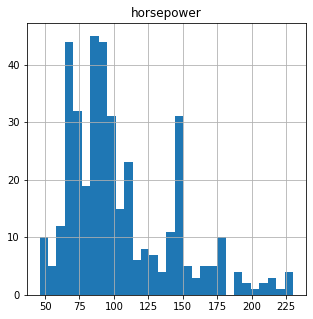

In [ ]:
#Generemos algunas gráficas directamente desde pandas.

num_bins = 30 #Número de columnas del histograma
df.hist(column='horsepower', bins=num_bins, figsize=(5,5))  #Histograma.

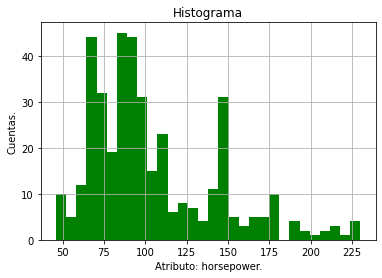

In [ ]:
#Ahora generemos el histograma usando la librería matplotlib sobre la cual tenemos un poco más de control en los parámetros de la gráfica.

horsepower = df['horsepower'].values        #Extraemos el ndarray correspondiente de la columna horsepower.
num_bins = 30                               #Número de divisiones que vamos a usar para el histograma. 
n, bins, patches = plt.hist(horsepower, num_bins, density=False, facecolor='green')
plt.xlabel('Atributo: horsepower.')         #Texto en el eje x.
plt.ylabel('Cuentas.')                      #Texto en el eje y.
plt.title('Histograma')                     #Título del gráfico. 
plt.grid(True)                              #Activamos la cuadrícula.
plt.show()                                  #Mostramos el gráfico. 

Text(0.5, 1.0, 'Histograma')

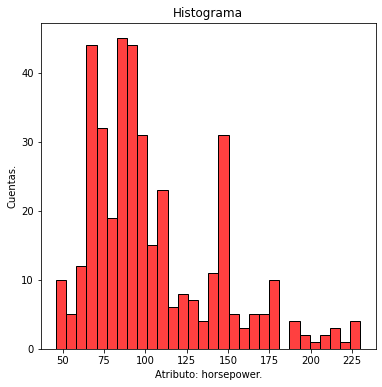

In [ ]:
#Ahora generemos el histograma usando la librería seaborn.
plt.figure(figsize=(6,6))
sns.histplot(data     = df, 
             x        ='horsepower',
             bins     = 30,
             color    = 'red',
             fill     = True,
             stat     = 'count')    #'count' muestra el número de observaciones.
                                    #'frequency' muestra el número de observaciones dividida por el ancho del bin.
                                    #'density' normaliza las cuentas tal que el área del histograma es 1.
                                    #'probability' normaliza las cuentas tal que la suma de la altura de las barras es 1.

plt.xlabel('Atributo: horsepower.') #Texto en el eje x.
plt.ylabel('Cuentas.')              #Texto en el eje y.
plt.title('Histograma')             #Título del gráfico. 

Text(0.5, 1.0, 'Histograma')

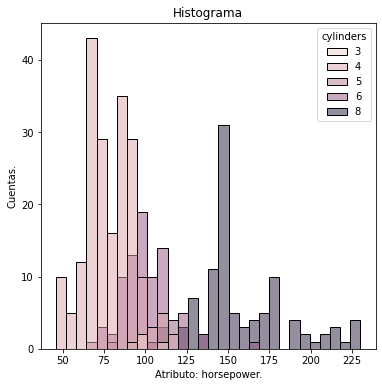

In [ ]:
#Qué tal si coloreamos el histograma de acuerdo con el número de cilindros de los vehículos?
plt.figure(figsize=(6,6))
sns.histplot(data     = df, 
             x        ='horsepower',
             bins     = 30,
             hue      = 'cylinders',
             fill     = True,
             stat     = 'count')  #'count' muestra el número de observaciones.
                              #'frequency' muestra el número de observaciones dividida por el ancho del bin.
                              #'density' normaliza las cuentas tal que el área del histograma es 1.
                              #'probability' normaliza las cuentas tal que la suma de la altura de las barras es 1.

plt.xlabel('Atributo: horsepower.') #Texto en el eje x.
plt.ylabel('Cuentas.')              #Texto en el eje y.
plt.title('Histograma')             #Título del gráfico. 


In [ ]:
#Vamos a generar otro gráfico exploratorio muy común, pero esta vez vamos a utilizar la librería altair.

import altair as alt   #Altair: Declarative Visualization in Python. https://altair-viz.github.io

alt.Chart(df).mark_point().encode(
  x='horsepower',
  y='mpg',
  color='cylinders'
).interactive()

alt.Chart(...)

## **Actividad 9. Construya el histograma de dos atributos que le parezcan interesantes (diferentes a 'horsepower') e indique que información le aportan.**

Text(0.5, 1.0, 'Histograma')

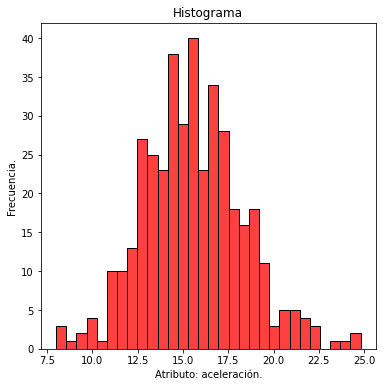

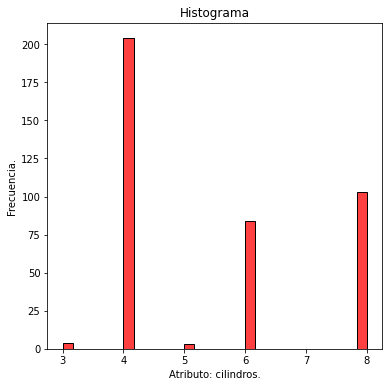

In [ ]:
plt.figure(figsize=(6,6))
sns.histplot(data     = df, 
             x        ='acceleration',
             bins     = 30,
             color    = 'red',
             fill     = True,
             stat     = 'count')    #'count' muestra el número de observaciones.
                                    #'frequency' muestra el número de observaciones dividida por el ancho del bin.
                                    #'density' normaliza las cuentas tal que el área del histograma es 1.
                                    #'probability' normaliza las cuentas tal que la suma de la altura de las barras es 1.

plt.xlabel('Atributo: aceleración.') #Texto en el eje x.
plt.ylabel('Frecuencia.')              #Texto en el eje y.
plt.title('Histograma') 

plt.figure(figsize=(6,6))
sns.histplot(data     = df, 
             x        ='cylinders',
             bins     = 30,
             color    = 'red',
             fill     = True,
             stat     = 'count')    #'count' muestra el número de observaciones.
                                    #'frequency' muestra el número de observaciones dividida por el ancho del bin.
                                    #'density' normaliza las cuentas tal que el área del histograma es 1.
                                    #'probability' normaliza las cuentas tal que la suma de la altura de las barras es 1.

plt.xlabel('Atributo: cilindros.') #Texto en el eje x.
plt.ylabel('Frecuencia.')              #Texto en el eje y.
plt.title('Histograma') 

La Primera grafica nos indica la acelaracion que tienen los vehiculos del dataset.

La segunda grafica nos muestra el numero de cilindros que tiene cada vehiculo del dataset, aqui vemos que la mayoria de vehiculos tienen 4 cilindros.

## **Actividad 10. Construya una gráfica de correlación entre las variables usando el dataframe df_no_nan.**

*   a. Indique cuáles cuáles son las tres variables que mejor se correlacionan con la variable target 'kpg'.
*   b. Analice el resultado obtenido (por ejemplo, indique si tiene sentido la correlación, si era esperada, etc.).

a. En el dataframe d_no_nan solo la variable kpg tiene en sus unidades a los kilometros, las otras variables como aceleración y desplazamiento no. Por ende no son las que mejor correlación tendrán con kpg. Entonces las 3 variables que mejor correlación tienen con la variable kpg son: número de cilindros , peso y caballos de fuerza.

b. Tiene sentido esta correlación y es esperada puesto que un vehículo con más cilindros, debe pesar más (porque tiene más componentes para su funcionamiento) y esto hace que el motor se esfuerce más entonces la gasolina rinde menos y por ende los kilometros que hace por galón, son menos.

In [ ]:
alt.Chart(df_no_nan).mark_point().encode(
  x='horsepower',
  y='kpg',
  color='cylinders'
).interactive()

alt.Chart(...)

## **Actividad 11. 'Juegue' con el dataset y genere al menos dos preguntas cuya respuesta pueda mostrar de manera gráfica, por ejemplo: cómo se comporta el consumo de acuerdo a la marca de los autos.**

**Como se comporta el consumo de acuerdo al peso del vehiculo?**


In [ ]:
alt.Chart(df_no_nan).mark_point().encode(
  x='kpg',
  y='weight'
).interactive()

alt.Chart(...)

**Como se comporta el consumo kpg segun el origen del vehiculo?**

Text(0.5, 1.0, 'Histograma')

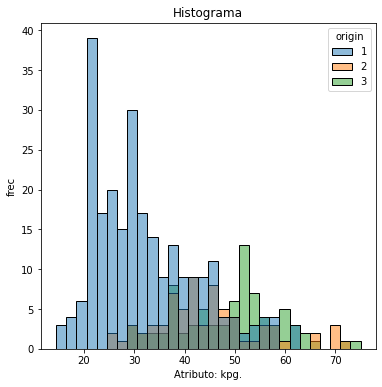

In [ ]:

plt.figure(figsize=(6,6))
ax = plt.axes()
sns.histplot(data     = df_no_nan, 
             x        ='kpg',
             bins     = 30,
             hue      = 'origin',
             fill     = True,
             stat     = 'count',
             palette  = 'tab10')  

plt.xlabel('Atributo: kpg.') #Texto en el eje x.
plt.ylabel('frec')              #Texto en el eje y.
plt.title('Histograma')   


## **Actividad 12. Revise y genere otro gráfico que pueda ser útil para entender mejor el conjunto de datos que usamos en este taller. Puede usar los siguientes recursos:**

Pandas: https://pandas.pydata.org/docs/user_guide/visualization.html

Matplotlib: https://matplotlib.org/3.1.1/gallery/index.html 

Seaborn: https://seaborn.pydata.org/examples/index.html 

Altair: https://altair-viz.github.io

**Atributo origen**
1. Carros americanos
2. Carros europeos
3. Carros asiatiacos

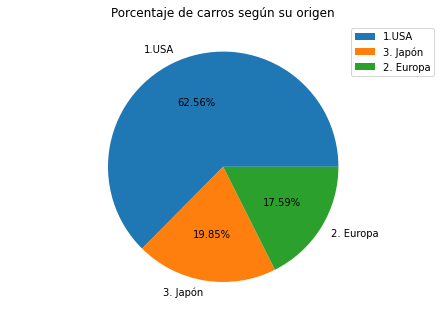

In [ ]:
count = df_no_nan['origin'].value_counts()

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')

ax.pie(count, 
       labels=["1.USA","3. Japón","2. Europa"],
       autopct='%1.2f%%')
ax.set_title("Porcentaje de carros según su origen")
plt.legend()
plt.show()




# **FIN**